<center>
    <img src="https://drive.google.com/uc?export=view&id=193xBTXxt8KGygqVxT6-JnCa4FddW2yOg" width="500"/>
</center>

<h1 align=center><b>Assignment: REST API and data visualization for weather forecast</b></h1>

#### Class name: ________AI1706______________

#### Student code: _________HE173389___________

#### Student name: _____Nguyễn Hoàng Thái______


# Introduction

Assignment 2 is an individual assignment. To complete the assignment students will need to use the OpenWeatherMap API to get weather forecast information from OpenWeatherMap and answer the corresponding questions.

**To complete this assignment you should done the following task:**

1.  Import packages library need for other tasks
2.  Carefully read about open weather map API
3.  Create open weather map account to get API key
4.  Using open weather map API to get forecast data
5.  Extract forecast data to answer the questions

Estimate time: **120** minutes

In [2]:
# This lab require some library packages. If error happen when running please uncomment lines below to install them:
install.packages("httr")
install.packages("rvest")

Installing package into 'C:/Users/admin/scoop/persist/r/site-library'
(as 'lib' is unspecified)



package 'httr' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\admin\AppData\Local\Temp\RtmpyeB9WG\downloaded_packages


Installing package into 'C:/Users/admin/scoop/persist/r/site-library'
(as 'lib' is unspecified)



package 'rvest' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\admin\AppData\Local\Temp\RtmpyeB9WG\downloaded_packages


In [3]:
# import required modules
library(jsonlite)
library(ggplot2)
library(tidyverse)

Warning message:
"package 'tidyverse' was built under R version 4.3.2"
Warning message:
"package 'readr' was built under R version 4.3.2"
Warning message:
"package 'forcats' was built under R version 4.3.2"
Warning message:
"package 'lubridate' was built under R version 4.3.2"
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ readr     2.1.4     ✔ tidyr     1.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter()  masks stats::filter()
✖ purrr::flatten() masks jsonlite::flatten()
✖ dplyr::lag()     masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


### 1. OpenWeatherMap API
**OpenWeatherMap** is an online service, owned by `OpenWeather Ltd`, that provides global weather data via API, including current weather data, forecasts, nowcasts and historical weather data for any geographical location. The company provides a minute-by-minute hyperlocal precipitation forecast for any location. The convolutional machine learning model is used to utilise meteorological broadcast services and data from airport weather stations, on-ground radar stations, weather satellites, remote sensing satellites, METAR and automated weather stations.

The company has more than 2 million customers, ranging from independent developers to Fortune 500 companies.

The variety of weather APIs provided by OpenWeatherMap have found a significant popularity among the software developers, which resulted in the growing multitude of repositories on GitHub. The APIs support multiple languages, units of measurement and industry standard data formats like JSON and XML.


### About the API:
OpenWeatherMap provides a range of weather-related products in a variable combination of depth and steps of measurement to millions of clients globally. The product range includes current, historical and forecasted weather data with the granularity as high as 1 minute. The length of the nowcast reaches 2 hours, short-term forecast reaches 16 days and long-term forecast can reach up to 1 year length. Historical weather data goes over 40 years deep. OpenWeather also provides a range of weather maps and weather alert services. Visit following link for more information about open weather map API

https://openweathermap.org/api

### 2. Getting API Key

OpenWeather platform provide a set of elegant and widely recognisable APIs. Powered by convolutional machine learning solutions, it is capable of delivering all the weather information necessary for decision-making for any location on the globe. To start using the APIs, please **<a href='https://home.openweathermap.org/users/sign_up'>sign up here</a>**.

After sign up, visit the following link to get the API Key:
https://home.openweathermap.org/api_keys

In [4]:
# Enter your API key here
api_key = "ac0e1cf1a1f9a8d8b89059422218290d"

### <a id = "pandas_read">3. Current weather condition example</a>

Replace your API key and run the examplpe code below. You should see the current weather data in Hanoi, VietNam

In [5]:
API_call = "https://api.openweathermap.org/data/2.5/weather?lat=%s&lon=%s&appid=%s"
lat = 21.0277644
lon = 105.8341598
 
complete_url = sprintf(API_call, lat, lon, api_key)
print(complete_url)
json <- fromJSON(complete_url)

print(paste("Location:", json$name))
print(paste("Temperature:", json$main$temp - 273.2,"°C"))
print(paste("Humidity:", json$main$humidity,"%"))
print(paste("Weather condition:", json$weather$description))


[1] "https://api.openweathermap.org/data/2.5/weather?lat=21.0277644&lon=105.8341598&appid=ac0e1cf1a1f9a8d8b89059422218290d"
[1] "Location: Hanoi"
[1] "Temperature: 27.94 °C"
[1] "Humidity: 79 %"
[1] "Weather condition: few clouds"


### 4. Construct the URL

To get the proper API call URL format, please review the list of APIs provided by OpenWeatherMap. Each API will provide a suitable URL to get the corresponding data. 

For example: The following API URL can only be use to get `current weather` condition.
```python
API_call = "https://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid={API key}"
```
You should replare `{lat}`, `{lon}`, `{API key}` with appropriate values

**Note:** Careful reading API document: https://openweathermap.org/api to find appropriate API for the tasks

# Problem

### Task 1. Request weather forecast the data
Write R code use Open Weather Map API to get forecast data about **5 day / 3 hour at Hanoi, VietNam**. Convert all temperature to Celcius degrees. After this task completed, you should display first 6 rows of a data frame.

In [25]:
API_call_forecast = "https://api.openweathermap.org/data/2.5/forecast?lat=%s&lon=%s&appid=%s"
complete_url_forecast = sprintf(API_call_forecast, lat, lon, api_key)
json_forecast <- fromJSON(complete_url_forecast)

df1 <- data.frame(
  id = sapply(json$list$weather, function(entry) entry$id), 
  date = json$list$dt_txt,
  temp = json$list$main$temp - 273,
  speed = json$list$wind$speed,
  weather_conditions = sapply(json$list$weather, function(entry) entry$description),
  main_weather = sapply(json$list$weather, function(entry) entry$main),                            
  feel = json$list$main$feels_like - 273,
  min_temp = json$list$main$temp_min - 273,
  max_temp = json$list$main$temp_max - 273,
  pressure_level = json$list$main$pressure,
  sea = json$list$main$sea_level,
  grnd = json$list$main$grnd_level,
  humidity_percent = json$list$main$humidity,
  temp_kf = json$list$main$temp_kf,
  deg = json$list$wind$deg,
  gust = json$list$wind$gust
)

head(df1)

,id,date,temp,speed,weather_conditions,main_weather,feel,min_temp,max_temp,pressure_level,sea,grnd,humidity_percent,temp_kf,deg,gust
,<int>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<dbl>,<int>,<dbl>
1,801,2023-11-10 15:00:00,27.14,3.55,few clouds,Clouds,30.06,25.98,27.14,1015,1015,1013,82,1.16,156,7.40
2,801,2023-11-10 18:00:00,26.51,2.85,few clouds,Clouds,26.51,25.26,26.51,1015,1015,1012,84,1.25,139,5.90
3,801,2023-11-10 21:00:00,25.46,2.24,few clouds,Clouds,26.34,24.62,25.46,1014,1014,1012,88,0.84,132,4.71
4,801,2023-11-11 00:00:00,25.15,1.78,few clouds,Clouds,26.00,25.15,25.15,1016,1016,1014,88,0.00,117,3.28
5,802,2023-11-11 03:00:00,29.82,2.77,scattered clouds,Clouds,32.93,29.82,29.82,1016,1016,1015,63,0.00,135,3.46
6,500,2023-11-11 06:00:00,31.25,3.13,light rain,Rain,34.00,31.25,31.25,1013,1013,1012,55,0.00,139,3.60


### Task 2. Plot a line chart to represent temperature over all the data in dataset 

- The chart should show each line for wind speed and gust level
- Each legend should has legend
- Set ylabel is `value`.

Find the minimum, maximum gust level and time of occurrence.

[1] "Minimum gust level:  1.64  at  2023-11-15 03:00:00"
[1] "Maximum gust level:  12.28  at  2023-11-13 06:00:00"


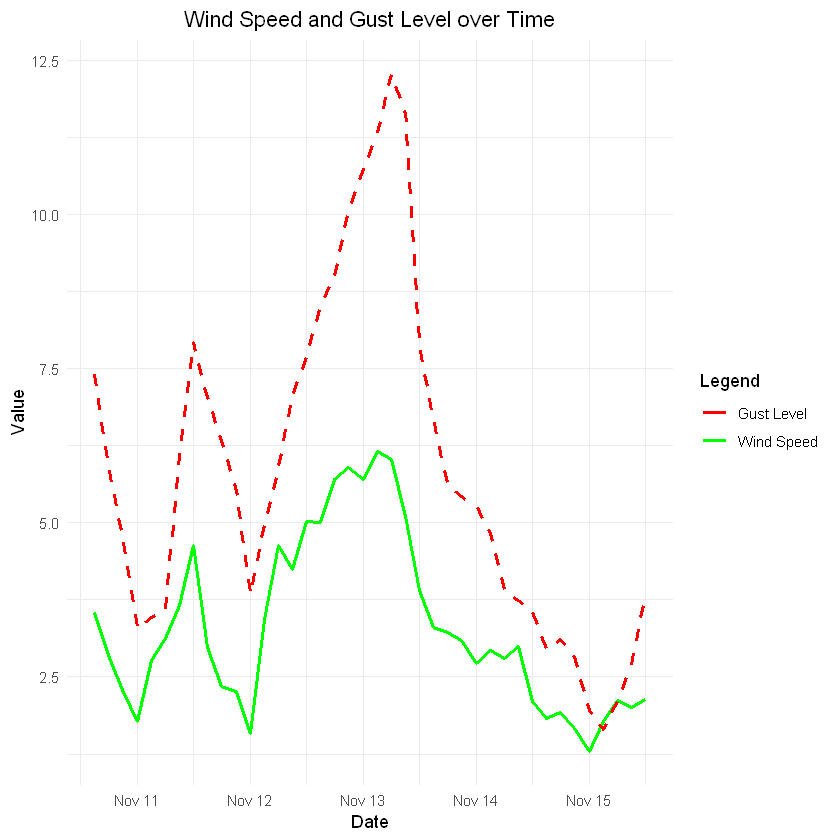

In [10]:
library(lubridate)

df2 <- data.frame(
  date = ymd_hms(json_forecast$list$dt_txt),
  wind_speed = json_forecast$list$wind$speed,
  gust = json_forecast$list$wind$gust
)

df2 <- df2 %>% ungroup()

ggplot(df2, aes(x = date)) +
  geom_line(aes(y = wind_speed, color = "Wind Speed"), linetype = "solid", linewidth = 1) +
  geom_line(aes(y = gust, color = "Gust Level"), linetype = "dashed", linewidth = 1) +
  scale_color_manual(values = c("Wind Speed" = "green", "Gust Level" = "red")) +
  labs(title = "Wind Speed and Gust Level over Time",
       x = "Date",
       y = "Value",
       color = "Legend") +
  theme_minimal() +
  theme(plot.title = element_text(hjust = 0.5))

min_gust <- min(df2$gust, na.rm = TRUE)
max_gust <- max(df2$gust, na.rm = TRUE)
min_gust_time <- df2$date[which.min(df2$gust)]
max_gust_time <- df2$date[which.max(df2$gust)]

print(paste("Minimum gust level: ", min_gust, " at ", min_gust_time))
print(paste("Maximum gust level: ", max_gust, " at ", max_gust_time))


### Task 3. Use a pie chart to show percentages of weather conditions (`description` column)

- The chart should has title: `percentages of weather conditions`
- Percentage of each conditions should be showed clearly


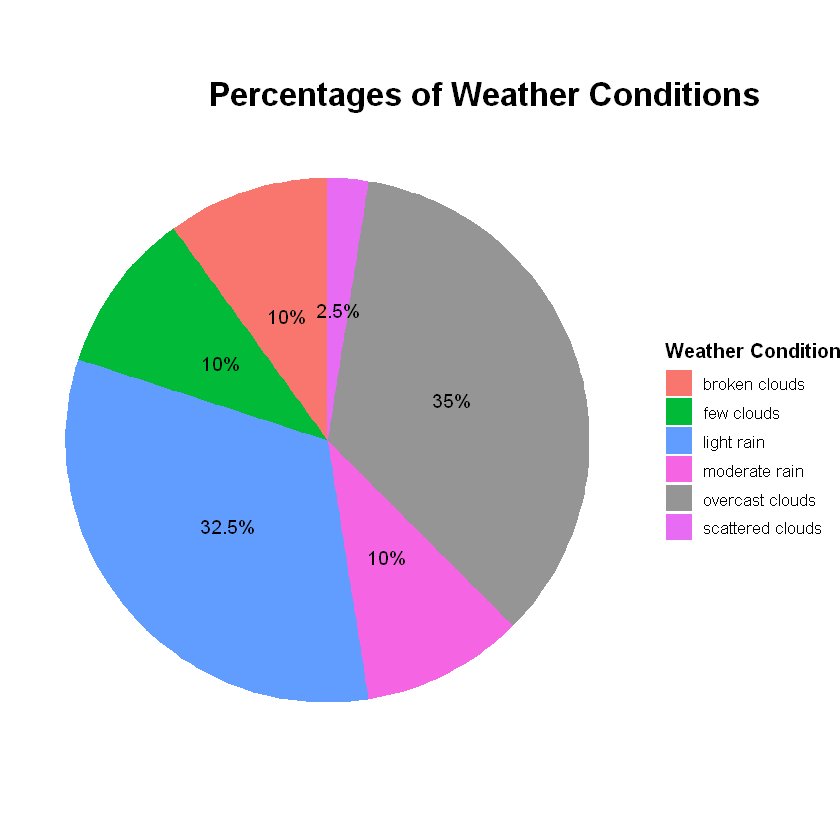

In [7]:
library(purrr)

df3 <- data.frame(
  date = ymd_hms(json_forecast$list$dt_txt),
  weather = map_chr(json_forecast$list$weather, ~ .x$description[1])
)

df_percent <- df3 %>%
  group_by(weather) %>%
  summarise(n = n()) %>%
  mutate(percentage = n / sum(n) * 100)

colors <- c("#F8766D", "#00BA38", "#619CFF", "#F564E3", "#959595",
            "#E76BF3", "#00BFC4", "#FF62BC", "#FB61D7", "#E1D5A6")

ggplot(df_percent, aes(x = "", y = percentage, fill = weather)) +
  geom_bar(width = 1, stat = "identity") +
  scale_fill_manual(values = colors) +
  coord_polar("y", start = 0) +
  theme_void() +
  labs(title = "Percentages of Weather Conditions", fill = "Weather Condition") +
  geom_text(aes(label = paste0(round(percentage, 1), "%")), position = position_stack(vjust = 0.5), size = 4, color = "black") +
  theme(plot.title = element_text(hjust = 2, size = 20, face = "bold", color = "black"),
        legend.title = element_text(size = 12, face = "bold"),
        legend.text = element_text(size = 10))



### Task 4. box plots
Use box plots to visualize humidity data for the following 4 days.

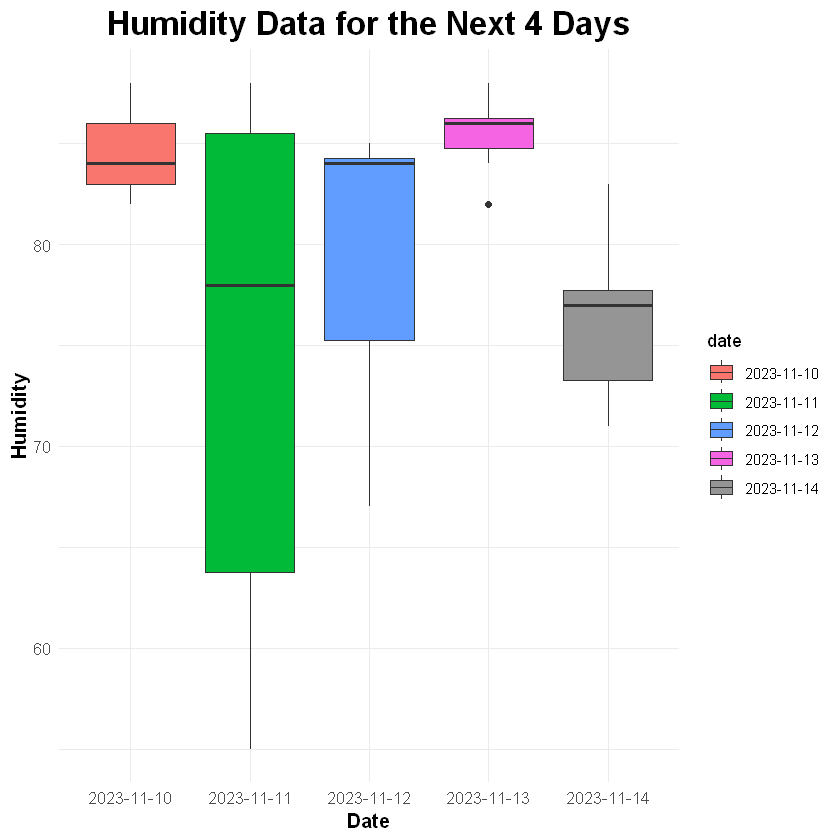

In [27]:
df4 <- data.frame(
  date = ymd_hms(json_forecast$list$dt_txt),
  humidity = json_forecast$list$main$humidity
)

df4 <- df4[df4$date <= min(df4$date) + days(4), ]

df4$date <- as.Date(df4$date)
df4$date <- as.factor(df4$date)

colors <- c("#F8766D", "#00BA38", "#619CFF", "#F564E3", "#959595",
            "#E76BF3", "#00BFC4", "#FF62BC", "#FB61D7", "#E1D5A6")

ggplot(df4, aes(x = date, y = humidity)) +
  geom_boxplot(aes(fill = date)) +
  scale_fill_manual(values = colors) +
  labs(title = "Humidity Data for the Next 4 Days",
       x = "Date",
       y = "Humidity") +
  theme_minimal() +
  theme(plot.title = element_text(hjust = 0.5, size = 20, face = "bold", color = "black"),
        axis.title.x = element_text(size = 12, face = "bold"),
        axis.title.y = element_text(size = 12, face = "bold"),
        axis.text.x = element_text(size = 10),
        axis.text.y = element_text(size = 10))


### Task 5. Scatter chart

Use scatter chart to show the correlation between feels-like and air humidity.

Please write a comment about this correlation.

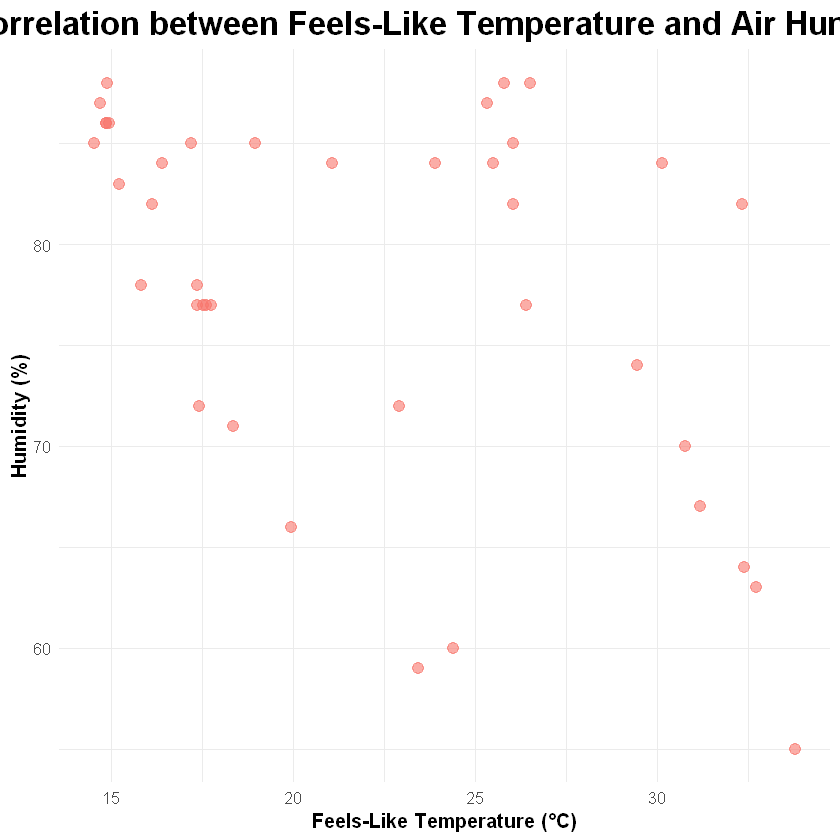

In [9]:
df5 <- data.frame(
  feels_like = json_forecast$list$main$feels_like - 273.2,
  humidity = json_forecast$list$main$humidity
)

ggplot(df5, aes(x = feels_like, y = humidity)) +
  geom_point(color = "#F8766D", size = 3, alpha = 0.6) +
  labs(title = "Correlation between Feels-Like Temperature and Air Humidity",
       x = "Feels-Like Temperature (°C)",
       y = "Humidity (%)") +
  theme_minimal() +
  theme(plot.title = element_text(hjust = 0.5, size = 20, face = "bold", color = "black"),
        axis.title.x = element_text(size = 12, face = "bold"),
        axis.title.y = element_text(size = 12, face = "bold"),
        axis.text.x = element_text(size = 10),
        axis.text.y = element_text(size = 10))

## Author

#### <a href="" target="_blank">Do Thai Giang</a>

## Change Log

| Date (YYYY-MM-DD) | Version | Changed By | Change Description              |   
| ----------------- | ------- | ---------- | ----------------------------------
| 2022-09-28        | 1.0     | Giangdt26  | Create the 1st version          | 
| 2023-07-18        | 1.1     | Giangdt26  | Add cheat warning!              |
| 2023-07-18        | 1.2     | Giangdt26  | Remove min, max in task 2       |
| 2023-07-18        | 1.3     | Giangdt26  | Add humidity, pressure in task 2|
|                                                      

<hr>

## <h3 align="center"> © FPT University. All rights reserved. <h3/>
